In [4]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml  # mnist datasetini yüklemek için gerekli...
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# Bu işlem 1-2 dk sürebilir..
mnist = fetch_openml('mnist_784')

In [5]:
mnist.data.shape


(70000, 784)

In [6]:
# Parametre olarak dataframe ve ilgili veri fotoğrafının index numarasını alsın..
def showimage(dframe, index):    
    some_digit = dframe.to_numpy()[index]
    some_digit_image = some_digit.reshape(28,28)

    plt.imshow(some_digit_image,cmap="binary")
    plt.axis("off")
    plt.show()

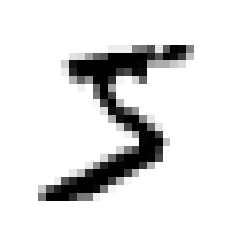

In [7]:
# Örnek kullanım:
showimage(mnist.data, 0)

In [8]:

# test ve train oranı 1/7 ve 6/7
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [9]:
type(train_img)

pandas.core.frame.DataFrame

In [10]:
# Rakam tahminlerimizi check etmek için train_img dataframeini kopyalıyoruz, çünkü az sonra değişecek..
test_img_copy = test_img.copy()

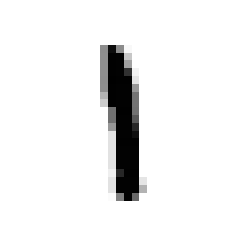

In [11]:
showimage(test_img_copy, 2)

In [12]:
scaler = StandardScaler()

# Scaler'ı sadece training set üzerinde fit yapmamız yeterli..
scaler.fit(train_img)

# Ama transform işlemini hem training sete hem de test sete yapmamız gerekiyor..
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [28]:
# Make an instance of the Model
pca = PCA(.90)

In [29]:
# PCA'i sadece training sete yapmamız yeterli: (1 dk sürebilir)
pca.fit(train_img)

PCA(n_components=0.9)

In [30]:
# Bakalım 784 boyutu kaç boyuta düşürebilmiş (%95 variance'ı koruyarak tabiiki)
print(pca.n_components_)

187


In [31]:
# Şimdi transform işlemiyle hem train hem de test veri setimizin boyutlarını 784'ten 327'e düşürelim:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [32]:
# default solver çok yavaş çalıştığı için daha hızlı olan 'lbfgs' solverı seçerek logisticregression nesnemizi oluşturuyoruz.
logisticRegr = LogisticRegression(solver = 'lbfgs', max_iter=10000)

In [33]:
# (Birkaç dk sürebilir)
logisticRegr.fit(train_img, train_lbl)

LogisticRegression(max_iter=10000)

In [19]:
logisticRegr.predict(test_img[0].reshape(1,-1))

array(['0'], dtype=object)

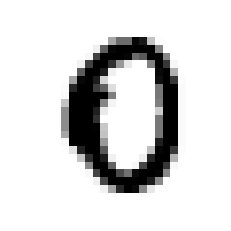

In [20]:
showimage(test_img_copy, 0)

In [21]:
logisticRegr.predict(test_img[1].reshape(1,-1))

array(['4'], dtype=object)

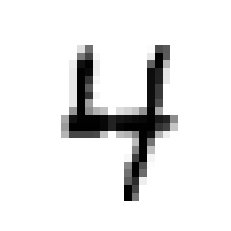

In [22]:
showimage(test_img_copy, 1)

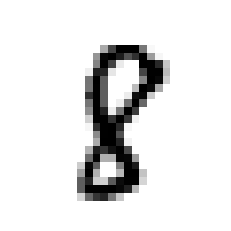

In [23]:
showimage(test_img_copy, 9900)

In [24]:
logisticRegr.predict(test_img[9900].reshape(1,-1))

array(['8'], dtype=object)

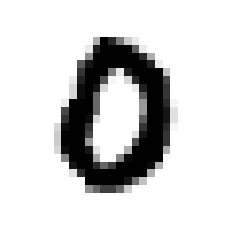

In [25]:
showimage(test_img_copy, 9999)

In [26]:
logisticRegr.predict(test_img[9999].reshape(1,-1))

array(['0'], dtype=object)

In [27]:
# Modelimizin doğruluk oranı (accuracy) ölçmek için score metodunu kullanacağız:

logisticRegr.score(test_img, test_lbl)

0.9184